In [5]:
# read data fomr almostdone.csv into pandas dataframe
# and plot the data
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('final_output_processed.csv')

df = df[['salary', 'position_name']]

df = df.dropna()

df = df[df['salary'].str.contains('[a-zA-Z]')==False]

df['salary'] = df['salary'].astype(float).astype(int)

df = df[(df['salary'] != 0) & (df['salary'] < 20000)]


df['position_name'] = df['position_name'].str.lower()
print("After lowercase conversion:")
print(df['position_name'].head())

# Remove all non-alphabetic characters
df['position_name'] = df['position_name'].str.replace(r'[^a-zA-Z]', ' ')
print("After removing non-alphabetic characters:")
print(df['position_name'].head())

# Remove all extra spaces
df['position_name'] = df['position_name'].str.replace(r'\s+', ' ')
print("After removing extra spaces:")
print(df['position_name'].head())

# Remove leading and trailing spaces
df['position_name'] = df['position_name'].str.strip()
print("After stripping leading and trailing spaces:")
print(df['position_name'].head())
#remove all spaces
df['position_name'] = df['position_name'].str.replace(r' ', '')
print("After removing all spaces:")
print(df['position_name'].head())

# print(df['position_name'].value_counts())
# print(df['position_name'].unique())
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'position_name' column
df['position_name_encoded'] = label_encoder.fit_transform(df['position_name'])

# Drop the original 'position_name' column
df.drop(columns=['position_name'], inplace=True)

# Split data into features and target
X = df[['position_name_encoded']]
y = df['salary']

# Split the data into training and testing sets

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)




C:\Users\admin\AppData\Local\Temp\ipykernel_5196\3792180470.py:7: DtypeWarning: Columns (13,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,233,234,235,236,238,239,242,244) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_ou

After lowercase conversion:
12288    maintenance technician
12289    maintenance technician
12290    maintenance technician
12291    maintenance technician
12292    maintenance technician
Name: position_name, dtype: object
After removing non-alphabetic characters:
12288    maintenance technician
12289    maintenance technician
12290    maintenance technician
12291    maintenance technician
12292    maintenance technician
Name: position_name, dtype: object
After removing extra spaces:
12288    maintenance technician
12289    maintenance technician
12290    maintenance technician
12291    maintenance technician
12292    maintenance technician
Name: position_name, dtype: object
After stripping leading and trailing spaces:
12288    maintenance technician
12289    maintenance technician
12290    maintenance technician
12291    maintenance technician
12292    maintenance technician
Name: position_name, dtype: object
After removing all spaces:
12288    maintenancetechnician
12289    maintenan

C:\Users\admin\AppData\Local\Temp\ipykernel_5196\3792180470.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['position_name'] = df['position_name'].str.replace(r'[^a-zA-Z]', ' ')
C:\Users\admin\AppData\Local\Temp\ipykernel_5196\3792180470.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['position_name'] = df['position_name'].str.replace(r'\s+', ' ')


5814.275329926537
5093.17892642258
5101.284347514597
5810.7470878041295
5809.316719376126
5809.316719376126
5809.316719376126
5814.275329926537


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.w

Text(0.5, 1.0, 'Position Name Encoded vs Salary')

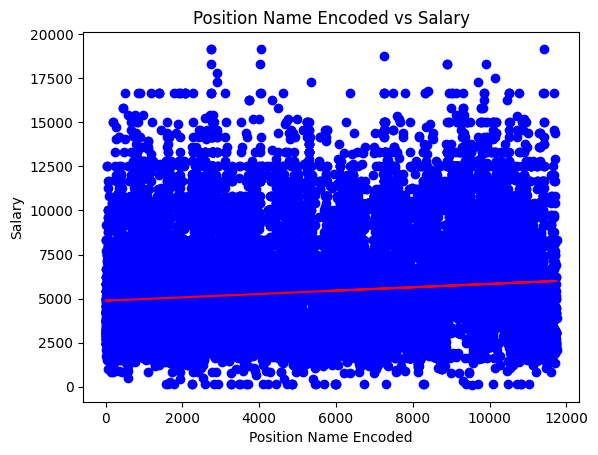

In [7]:
#create a test function to take job title and return salary
def test(job_title):
    job_title = job_title.lower()
    job_title = job_title.replace(r'[^a-zA-Z]', ' ')
    job_title = job_title.replace(r'\s+', ' ')
    job_title = job_title.strip()
    job_title = job_title.replace(r' ', '')
    job_title_encoded = label_encoder.transform([job_title])
    salary = model.predict([job_title_encoded])
    return salary[0]

print(test('softwareengineer'))
print(test('dataanalyst'))
print(test('dataengineer'))
print(test('softwaredeveloper'))
print(test('softwarearchitect'))
print(test('softwarearchitect'))
print(test('softwarearchitect'))
print(test('softwareengineer'))

#make a scatter plot
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Position Name Encoded')
plt.ylabel('Salary')
plt.title('Position Name Encoded vs Salary')


C:\Users\admin\AppData\Local\Temp\ipykernel_26828\2521247766.py:11: DtypeWarning: Columns (6,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,226,227,228,229,231,232,235,237) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('completeData.cs

(22256, 2)
       salary                                     orgTags_SKILLS
12288    6400  ['Blueprinting', 'Troubleshooting (Problem Sol...
12289    6400  ['Blueprinting', 'Troubleshooting (Problem Sol...
12290    6400  ['Blueprinting', 'Troubleshooting (Problem Sol...
12291    6400  ['Blueprinting', 'Troubleshooting (Problem Sol...
12292    6400  ['Blueprinting', 'Troubleshooting (Problem Sol...
(21323, 2)


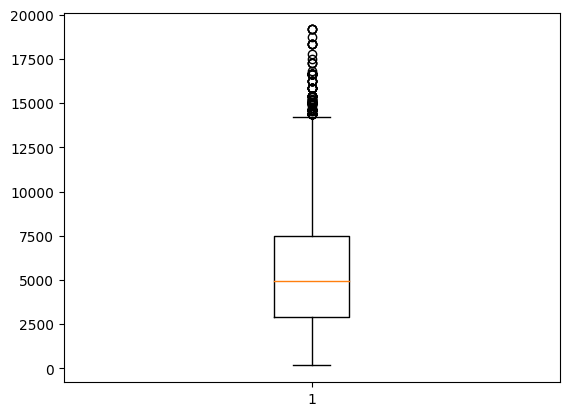

In [48]:
#salary model prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

df = pd.read_csv('completeData.csv')

#select columns salary and orgTags_SKILLS
df = df[['salary','orgTags_SKILLS']]

#remove rows with missing values
df = df.dropna()
#remove rows with NOT FOUND
df = df[df['orgTags_SKILLS'] != 'NOT FOUND']
df = df[df['salary'] != 'NOT FOUND']
#df salary doesnt contain letters
df = df[df['salary'].str.contains('[a-zA-Z]') == False]

df.to_csv('testing.csv', index=False)
print(df.shape)
#remove rows with salary > 20000
df['salary'] = df['salary'].astype(float)
df['salary'] = df['salary'].astype(int)
df = df[df['salary'] != 0]
df = df[df['salary'] < 20000]
#cast salary to int


print(df.head())
print(df.shape)
plt.boxplot(df['salary'])
plt.show()

#convert orgTags_SKILLS to list
df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: ast.literal_eval(x))
df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.lower() for y in x])
df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.replace(" ","") for y in x])
df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.replace("(","") for y in x])
df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.replace(")","") for y in x])
mlb = MultiLabelBinarizer()
df_pd = df.join(pd.DataFrame(mlb.fit_transform(df.pop('orgTags_SKILLS')),
                          columns=mlb.classes_,
                          index=df.index))

modelsalary = LinearRegression()
X = df_pd.drop('salary', axis=1)

y = df_pd['salary']

modelsalary.fit(X, y)
y_pred = modelsalary.predict(X)
print("error",mean_squared_error(y, y_pred))
plt.scatter(y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
#percsion recall f1 score calcaulation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_pred = modelsalary.predict(X)
y_pred = y_pred.astype(int)
y = y.astype(int)
print("precision",precision_score(y, y_pred, average='micro'))
print("recall",recall_score(y, y_pred, average='micro'))
print("f1",f1_score(y, y_pred, average='micro'))




In [3]:
import pickle
def make_prediction_salary(skill_list):
    # Normalize the input
    skill_list = [skill.lower().replace(" ", "").replace("(", "").replace(")", "") for skill in skill_list]
    
    # Transform the skills using the same mlb instance
    try:
        transformed_skills = mlb.transform([skill_list])
    except ValueError:
        print("Error: This skill was not seen in the training data and cannot be processed.")
        return None

    # Create a DataFrame 
    input_df = pd.DataFrame(transformed_skills, columns=mlb.classes_)

    # Predict using the trained model
    prediction = modelsalary.predict(input_df)
    prediction = max(0, prediction)

    return prediction

predicted_salary = make_prediction_salary(['python','java','sql','figma'])
if predicted_salary is not None:
    print("Predicted salary:", predicted_salary[0])


pickle.dump(modelsalary, open('salary_model.pkl', 'wb'))    
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Position Name Encoded')
plt.ylabel('Salary')
plt.title('Position Name Encoded vs Salary')


Predicted salary: 3137.2960674799515


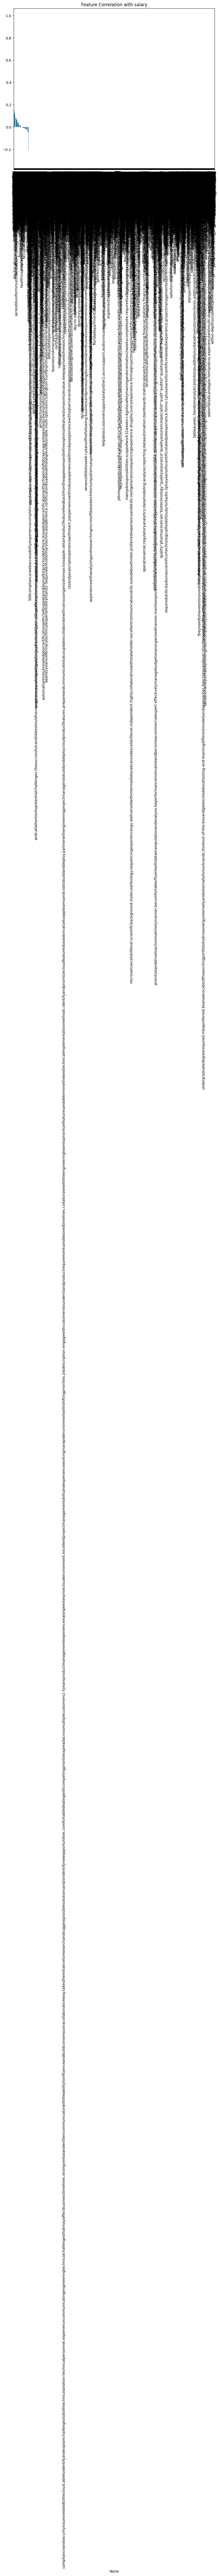

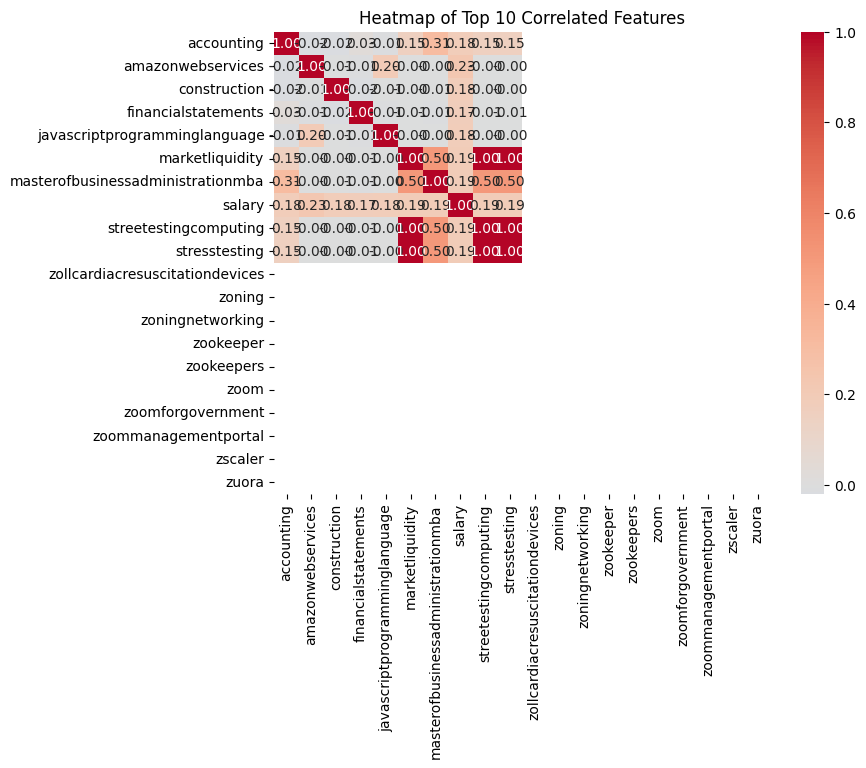

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_full = pd.concat([X[1:1000], y[1:1000]], axis=1)
df_full.shape

#  correlation matrix
corr_matrix = df_full.corr()

# The target variable slaary
target_corr = corr_matrix['salary'].sort_values(ascending=False)

# Plotting the correlations of the most correlated features
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title('Feature Correlation with salary')
plt.show()

top_positive = target_corr.head(10).index  # Top 10 positive correlations
top_negative = target_corr.tail(10).index  # Top 10 negative correlations
top_features = top_positive.union(top_negative)  # Combine top positive and negative
filtered_corr_matrix = df_full[top_features].corr()

# Plotting the focused heatmap
plt.figure(figsize=(8, 6))  
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap of Top 10 Correlated Features')
plt.show()




In [5]:
# #add more features to the salary prediction model
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import OneHotEncoder
# import ast
# from sklearn.preprocessing import MultiLabelBinarizer
# import matplotlib.pyplot as plt

# df = pd.read_csv('final_output_processed.csv')

# #select columns salary and orgTags_SKILLS
# df = df[['salary','orgTags_SKILLS','position_name']]

# #remove rows with missing values
# df = df.dropna()
# #remove rows with NOT FOUND
# df = df[df['orgTags_SKILLS'] != 'NOT FOUND']
# df = df[df['salary'] != 'NOT FOUND']
# #df salary doesnt contain letters
# df = df[df['salary'].str.contains('[a-zA-Z]') == False]

# df.to_csv('testing.csv', index=False)
# print(df.shape)
# #remove rows with salary > 20000
# df['salary'] = df['salary'].astype(float)
# df['salary'] = df['salary'].astype(int)
# df = df[df['salary'] != 0]
# df = df[df['salary'] < 20000]
# #cast salary to int


# print(df.head())
# print(df.shape)
# plt.boxplot(df['salary'])
# plt.show()

# #convert orgTags_SKILLS to list
# df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: ast.literal_eval(x))
# df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.lower() for y in x])
# df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.replace(" ","") for y in x])
# df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.replace("(","") for y in x])
# df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.replace(")","") for y in x])
# #convert position_name to string
# df['position_name'] = df['position_name'].astype(str)
# #convert position_name to lowercase
# df['position_name'] = df['position_name'].apply(lambda x: x.lower())

# print(df.head())
# print(df.shape)




# mlb = MultiLabelBinarizer()
# df_pd = df.join(pd.DataFrame(mlb.fit_transform(df.pop('orgTags_SKILLS')),
#                           columns=mlb.classes_,
#                           index=df.index))

# modelsalary = LinearRegression()
# # #add position_name to the model
# X = df_pd.drop('salary', axis=1)
# X = pd.get_dummies(X)
# y = df_pd['salary']

# modelsalary.fit(X, y)
# y_pred = modelsalary.predict(X)
# print("error",mean_squared_error(y, y_pred))
# plt.scatter(y, y_pred)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.show()



# # X = df_pd.drop(['salary','position_name'], axis=1)

# # y = df_pd['salary'] 


# # modelsalary.fit(X[0:100], y[0:100])
# # y_pred = modelsalary.predict(X[0:100])
# # print("error",mean_squared_error(y[0:100], y_pred))
# # plt.scatter(y[0:100], y_pred)
# # plt.xlabel('True Values')
# # plt.ylabel('Predictions')
# # plt.show()



In [6]:
#create a test function
import pickle
def make_prediction_salary(skill_list, position_name):
    # Normalize the input
    skill_list = [skill.lower().replace(" ", "").replace("(", "").replace(")", "") for skill in skill_list]
    
    # Transform the skills using the same mlb instance
    try:
        transformed_skills = mlb.transform([skill_list])
    except ValueError:
        print("Error: This skill was not seen in the training data and cannot be processed.")
        return None

    # Create a DataFrame 
    input_df = pd.DataFrame(transformed_skills, columns=mlb.classes_)
    input_df = input_df.join(pd.get_dummies([position_name]))
    # Predict using the trained model
    prediction = modelsalary.predict(input_df)
    prediction = max(0, prediction)

    return prediction

predicted_salary = make_prediction_salary(['python','java','sql','figma'], 'Software Engineer')

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Software Engineer
